# Freedom of Information complaints

The Israeli Government Freedom of Information Unit has the authority to investigate complaints about government ministries and their subsidiary units regarding:

* failure to publish annual reports and treports about the implementation of the Freedom of Information Act
* failure to publish information initiated by virtue of the law - administrative guidelines and environmental information – without a lawful explanation
* failure to respond to a request for information within the time frame or date set by law
* rejection of a request for information without a lawful explanation
* the manner in which fees are calculated, except fee exemptions


The database in this notebook comprises of 689 complaints made to the Freedom of Information Unit from April 25th 2021, to November 28th 2024(it is updated daily).
                                                                                                                                              
The original file is in Hebrew — Jupyter notebook refused to open it, so I manually translated all recurring terms in Google Spreadsheets. Wherever relevant, additional translation will be provided in comments.


In [330]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 4)

In [331]:
df = pd.read_csv("./complaints - b460e022-0f7c-48c6-ba64-ce16e1340056 (1).csv")

In [332]:
df

,complaint_number,request_date,complaint_date,complaint_channel,complainer_kind,complainer_name,complaint_topic,complaint_against,original_request_topic,status,decision,termination_date,days_to_treat
0,368/24,22/11/2023,28/10/2024,online form,citizen,NaN,failure to respond,משרד הבינוי והשיכון,בירור פרטני לעניין קביעת שכר הדירה,termination of treatment,unjustified,04/11/2024,7
1,217/21,17/11/2020,01/05/2021,online form,citizen,NaN,failure to respond,"בית חולים רמבם""",נתונים על מחלקות פסיכיאטריות,termination of treatment,unjustified,23/05/2021,22
2,218/21,29/10/2020,01/05/2021,online form,citizen,NaN,failure to respond,המרכז לבריאות הנפש שער מנשה,נתונים על מחלקות פסיכיאטריות,termination of treatment,justified,17/11/2021,200
3,220/21,29/10/2020,01/05/2021,online form,citizen,NaN,failure to respond,"המרכז לבריאות הנפש באר-יעקב נס-ציונה מבן (שב""ס)""",נתונים על מחלקות פסיכיאטריות,termination of treatment,justified,17/11/2021,200
4,221/21,29/10/2020,01/05/2021,online form,citizen,NaN,failure to respond,מרכז בריאות הנפש באר שבע,נתונים על מחלקות פסיכיאטריות,termination of treatment,justified,17/11/2021,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,103/24,08/11/2023,02/04/2024,online form,citizen,NaN,failure to respond,משרד המשפטים,failure to respond !במועד! סמוכין 395054 תאריך...,termination of treatment,unjustified,03/04/2024,1
684,312/24,25/08/2024,04/09/2024,online form,citizen,NaN,lack of reasoning,בית חולים איכילוב,תחלופת עובדים בלשכות הנהלה,termination of treatment,unjustified,09/09/2024,5
685,211/24,11/01/2024,19/06/2024,online form,non-profit organization,מוסרי,failure to respond,המשרד לשוויון חברתי,הסכמי התקשוריות ומכרזים,termination of treatment,justified,27/06/2024,8
686,459/22,16/08/2022,29/11/2022,online form,citizen,NaN,failure to respond,משרד הבריאות,בידוד נגיף הקורונה,termination of treatment,justified,02/03/2023,93


# cleaning the data

In [333]:
df = df.drop(columns=["complaint_number"])

# preliminary analysis
Lots of pie charts!

In [334]:
df.value_counts("complainer_kind")

complainer_kind
citizen                    479
non-profit organization    150
other                       39
company                     20
Name: count, dtype: int64

<Axes: ylabel='count'>

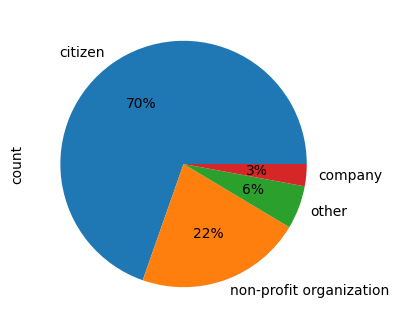

In [335]:
df["complainer_kind"].value_counts().plot(kind="pie", autopct='%1.0f%%')

### why did people complain?

In [336]:
df.value_counts("complaint_topic")

complaint_topic
failure to respond    641
lack of reasoning      47
Name: count, dtype: int64

<Axes: ylabel='count'>

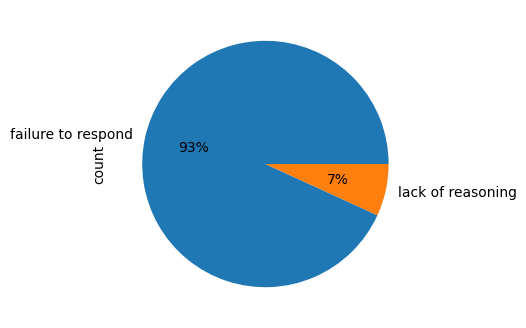

In [337]:
df["complaint_topic"].value_counts().plot(kind="pie", autopct='%1.000f%%')

### who's filing complaints?

In [338]:
df["complainer_kind"].value_counts()

complainer_kind
citizen                    479
non-profit organization    150
other                       39
company                     20
Name: count, dtype: int64

### what was the unit's decision?

In [339]:
df["decision"].value_counts()

decision
justified              460
unjustified            198
justified partially     15
Name: count, dtype: int64

<Axes: ylabel='count'>

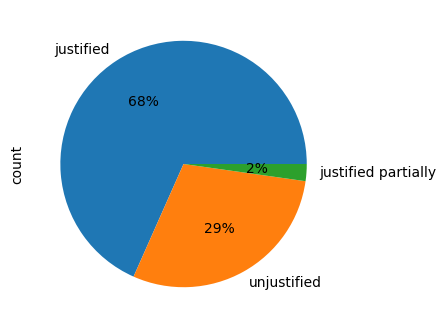

In [340]:
df["decision"].value_counts().plot(kind="pie", autopct='%1.0000f%%')

### How did people complain?

<Axes: ylabel='count'>

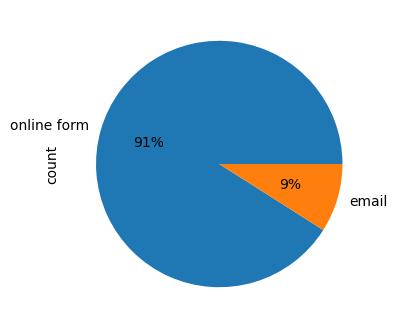

In [341]:
df["complaint_channel"].value_counts().plot(kind="pie", autopct='%1.0000f%%')

### Current status

<Axes: ylabel='count'>

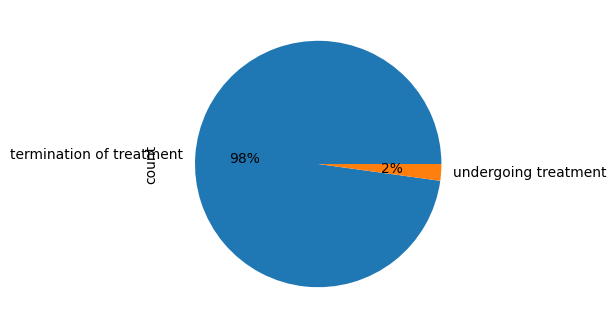

In [342]:
df["status"].value_counts().plot(kind="pie", autopct='%1.0000f%%')

## How many days does it take to treat a complaint?

In [343]:
df["days_to_treat"].describe()

count    688.000000
mean      78.603198
std       84.508621
min        0.000000
25%       20.000000
50%       49.000000
75%      106.250000
max      693.000000
Name: days_to_treat, dtype: float64

### a dataframe of all complaints that took a year and longer to treat

In [344]:
long_complaints = df[df["days_to_treat"] > 364 ]
long_complaints

,request_date,complaint_date,complaint_channel,complainer_kind,complainer_name,complaint_topic,complaint_against,original_request_topic,status,decision,termination_date,days_to_treat
36,22/05/2019,17/06/2021,online form,other,NaN,failure to respond,משרד הרווחה והשירותים החברתיים,הכרעת דין בנושא עגורנים שהועברה למשרד העבודה ל...,termination of treatment,unjustified,11/05/2023,693
145,04/04/2022,06/08/2022,email,citizen,NaN,lack of reasoning,משרד הבינוי והשיכון,קבלת מסמכים לפרויקט מחיר למשתכן שבירו רמת גן,termination of treatment,justified,24/01/2024,535
202,20/06/2021,09/08/2022,online form,other,NaN,failure to respond,משרד המשפטים,"מסמכים שונים -יועמש""",termination of treatment,justified,31/12/2023,509
348,23/11/2022,08/01/2023,online form,citizen,NaN,failure to respond,המשרד להגנת הסביבה,מסדרון וצוואר בקבוק אקולוגי גדרה,termination of treatment,unjustified,22/05/2024,500
593,24/04/2022,16/06/2022,online form,citizen,NaN,lack of reasoning,משרד הרווחה והשירותים החברתיים,מידע אודות הוסטל נחלים ברכסים,termination of treatment,unjustified,09/04/2024,663
682,16/04/2023,24/05/2023,online form,citizen,NaN,lack of reasoning,משטרת ישראל,סירוב גורף לבקשת מידע מיום 16.4.23,termination of treatment,unjustified,01/08/2024,435


Two complaints were made against the office of social services, one against the Ministry of Construction and Housing, one for the Ministry of Justice, one for the Ministry of Environmental Protection, and one for the Israeli Police. 

### What about the complaints that were closed immediately?

In [345]:
short_complaints = df[df["days_to_treat"] < 1]
short_complaints

,request_date,complaint_date,complaint_channel,complainer_kind,complainer_name,complaint_topic,complaint_against,original_request_topic,status,decision,termination_date,days_to_treat
98,02/11/2023,07/01/2024,email,citizen,NaN,failure to respond,משרד החינוך,מסמכים,termination of treatment,unjustified,10/01/2024,0
169,20/02/2024,20/03/2024,email,citizen,NaN,failure to respond,משרד הפנים,תיקי פיקוח,termination of treatment,unjustified,20/03/2024,0
294,22/10/2022,22/12/2022,online form,citizen,NaN,failure to respond,הנהלת בתי המשפט,בקשת מידע צווים שיפוטים,termination of treatment,unjustified,22/12/2022,0
399,09/11/2023,15/04/2024,online form,citizen,NaN,failure to respond,משרד המשפטים,failure to respond סמוכין 395069 תאריך 09.11.23,termination of treatment,unjustified,15/04/2024,0
455,03/07/2023,10/07/2023,online form,citizen,NaN,failure to respond,רשות מקרקעי ישראל,מידע על עסקאות,termination of treatment,unjustified,10/07/2023,0
458,07/11/2023,03/04/2024,online form,citizen,NaN,failure to respond,משרד המשפטים,failure to respond !במועד! סמוכין 394794 תאריך...,termination of treatment,unjustified,03/04/2024,0
555,24/11/2023,13/05/2024,online form,citizen,NaN,failure to respond,משרד המשפטים,failure to respond ! במועד ! סמוכין 396840 תאר...,termination of treatment,unjustified,13/05/2024,0
564,04/02/2023,11/05/2023,online form,citizen,NaN,lack of reasoning,משרד המשפטים,פרוטוקולים לשכת היועמש,termination of treatment,unjustified,11/05/2023,0


Five out of the eight entries are complaints against the Ministry of Justice.

### Is there a correlation between the time it took to treat the complaint and the decision the unit made eventually?

I was searching for types of charts that could be used for that. The problem was that days_to_treat is an int while decision is a string - but it only has 3 possible values. I've considered converting them into numbers and using scatter plot but it sounded like it would'nt make much sense, so I kept searching. I stumbled across a type of plot called 'violin plot' that seemed to make the most sense for this case, and found the [seaborn](https://seaborn.pydata.org/generated/seaborn.violinplot.html) library that seemed straightforward enough. 

In [346]:
!pip install seaborn

In [347]:
import seaborn as sns

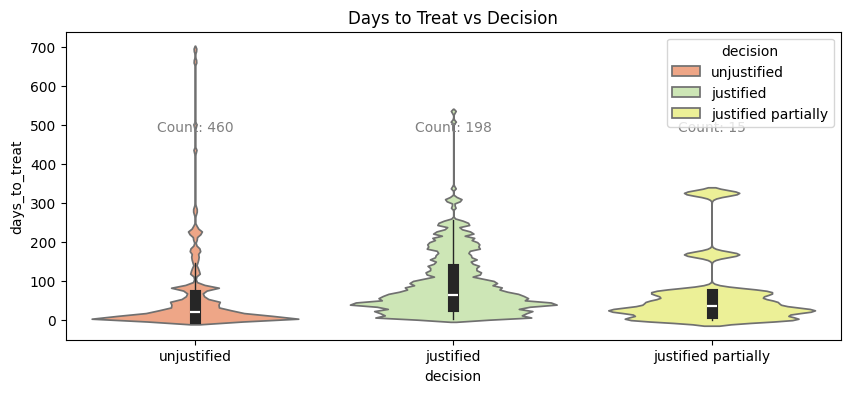

In [348]:
sns.violinplot(
    data=df, 
    x="decision", 
    y="days_to_treat", 
    hue="decision", 
    density_norm="count",
    bw_adjust=0.15, 
    inner_kws=dict(box_width=8, whis_width=1, color=".15"), 
    palette=["#FF9F76", "#CCEEAE", "#F9FF88"]
)

#adding annotation for the counts
for category in df["decision"].value_counts().index:
    x_position = list(df["decision"].value_counts().index).index(category)
    plt.text(
        x_position, 
        df["days_to_treat"].max() * 0.7, 
        f"Count: {df["decision"].value_counts()[category]}",
        ha="center", fontsize=10, color="grey"
    )


plt.title("Days to Treat vs Decision")
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()


In a violin plot, the inner box represents the interquartile range of the data for each category.

It goes from the 25th percentile and the 75th percentile of the data.
The horizontal line inside the box represents the median (50th percentile).
The "whiskers" extend to show the whole range of data excluding outliers.

The outer shape of the violin plot represents the density of the data (how frequently values occur) smoothed out by a kernel density estimation.

**So what can we learn from this plot?**
Most complaints close within 100 days, and for those that take longer, they are most likely justified.
But if something takes **very** long to treat, it's likely to be unjustified. It also seems like there's a small bump of terminated complaints around a year into the process - this could indicate some kind of deadline or inner procedure that the unit has, but it's not that clear. 

** I wanted the density of each violin to reflect the number of complaints, which is something the "density_norm" parameter should do, but it wouldn't work and I couldn't figure out why. I do think it's important to be aware of the actual counts, so I've instead included that in text.

## Who were complaints filed against?

In [349]:
df["complaint_against"].value_counts()[:18]

complaint_against
משרד הבריאות                      140
משרד החינוך                        60
צהל"                               57
משרד המשפטים                       55
משרד התחבורה והבטיחות בדרכים       40
משרד החקלאות ופיתוח הכפר           25
המשרד להגנת הסביבה                 23
משרד הרווחה והשירותים החברתיים     21
משטרת ישראל                        21
משרד ראש הממשלה                    20
משרד העבודה                        18
משרד האוצר                         16
הרשות הארצית לכבאות והצלה          15
משרד הבינוי והשיכון                14
הנהלת בתי הדין הרבניים             14
משרד התיירות                       13
רשות מקרקעי ישראל                  12
רשות האוכלוסין וההגירה             11
Name: count, dtype: int64

```
Translation:
Ministry of Health                      140
Ministry of Education                   60
IDF (Israeli army)                      57
Ministry of Justice                     55
Ministry of Transportation              40
Ministry of Agriculture                 25
Ministry of Environmental Protection    23
Ministry of Welfare and Social Services 21
Israel Police                           21
Prime Minister Office                   20
Ministry of Employment                  18
Treasury                                16
Fire and Rescue Authority               15
Ministry of Construction and Housing    14
The administration of rabbinical courts 14
Ministry of Tourism                     13
Israel Land Authority                   12
Population and Immigration Authority    11
```

### Complaints filed against VS days it took to treat the complaints

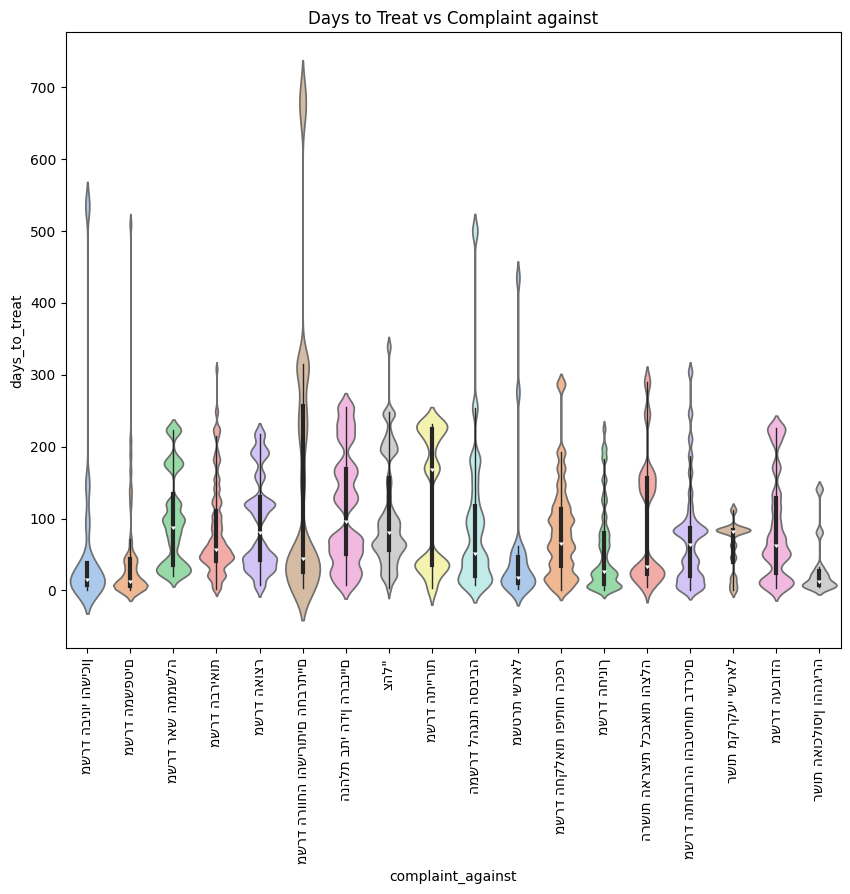

In [350]:
df_complaint_against = df[df["complaint_against"].isin(df["complaint_against"].value_counts().index[:18])]
sns.violinplot(
    data=df_complaint_against, 
    x="complaint_against", 
    y="days_to_treat", 
    hue="complaint_against", 
    density_norm="count",
    bw_adjust=0.2, 
    inner_kws=dict(box_width=3, whis_width=1, color=".15", marker=11),
    palette="pastel"
)

plt.xticks(rotation=90) 
plt.title("Days to Treat vs Complaint against")
plt.rcParams["figure.figsize"] = (16, 10)
plt.show()


**What can we possibly infer from this?** </br>
* The leaders in longest time to treat a complaint are:
1. Ministry of Welfare and Social Services
2. Ministry of Construction and Housing
3. Ministry of Environmental Protection
4. Ministry of Justice
5. Israeli Police

* Generally speaking, most complaints were treated within 100 days of submission. The ones that stand out in that regard are: the Ministry of the Prime Minister, the Treasury, the administration of rabbinical courts, the Ministry of Agriculture, and the Ministry of Employment.

### who are the leading complainers?
There are 4 types of complainers: citizens, non-profit orgaizations, companies, and "other". Only non-profit orgaizations have a name in the database, the others are anonymous. So lets take a look at those organizations

In [351]:
df_non_profit = df[df["complainer_kind"] == "non-profit organization"]
df_non_profit = df_non_profit.dropna(subset=["complainer_name"])
df_non_profit["complainer_name"].value_counts()

complainer_name
איחוד הישיבות בארי                                 21
תנו לחיות לחיות                                    12
מגן ביטחון                                         11
מוסרי ארגון זכויות אדם יהודי                        9
האגודה לזכויות האזרח                                8
אלוט                                                8
אזרחים למען אוויר נקי                               7
החברה להגנת הטבע                                    7
העמותה הקהילתית גבעת מרדכי                          5
לביא                                                4
המרכז להעצמת האזרח                                  4
מרכז רקמן, אוניברסיטת בר אילן                       3
מוסרי                                               3
תחרות - התנועה לחירות בתעסוקה                       3
מרכז טאוב לחקר המדיניות החברתית בישראל              3
התנועה לחופש המידע (ער)"                            3
המכון הישראלי לדמוקרטיה                             2
קו לעובד                                            2
נדן - סיוע מ

This is interesting. There are many different kinds of non-profit organizations on that list, most of which only complained once.
The top 11 (min 4 complaints including) are:
1. Be'eri Union of Yeshiva — an organization whose primary goal is to help people of the ultra-orthodox jewish community and provide representation and guidance before various authorities.
2. Let the Animal Live — an animals rights organization.
3. Magen Bitachon — providing assistance for employees and retirees of the Israeli Defense Forces.
4. Btsalmo - A "jewish human rights organization"
5. The Association for Civil Rights in Israel 
6. The Israeli Society for Autistic Children
7. Citizens for Clear Air
8. Society for the Protection of Nature in Israel
9. Givat Mordechai Community Association - promoting actions and providing assistance for the residents of Jerusalem in general, and the residents of the Givat Mordechai neighborhood in particular. 
10. Lavi - the municipal association for the development of education in Jerusalem
11. The Center for Citizen Empowerment - works to promote the performance capabilities of the Israeli government



In [352]:
top_complainers = df_non_profit["complainer_name"].value_counts()[:5]
top_complainers

complainer_name
איחוד הישיבות בארי              21
תנו לחיות לחיות                 12
מגן ביטחון                      11
מוסרי ארגון זכויות אדם יהודי     9
האגודה לזכויות האזרח             8
Name: count, dtype: int64

Lets try a dictionary to hold informationf for each non-profit arganization and look at who they filed a complaint against

In [353]:
complaints_data = {}

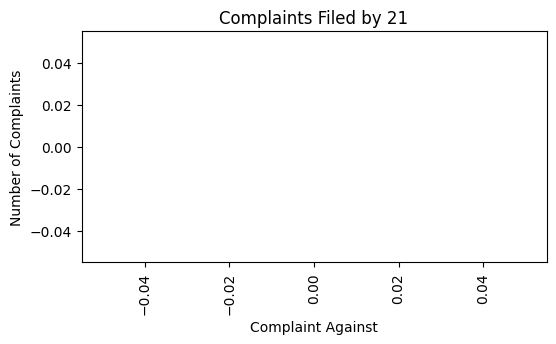

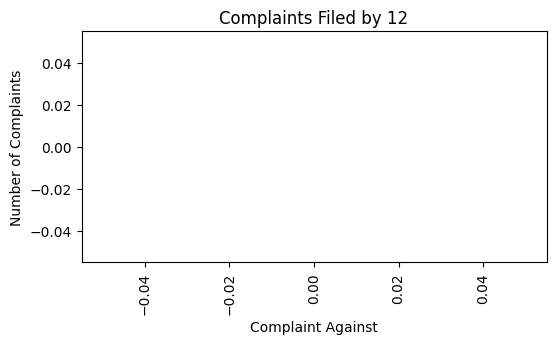

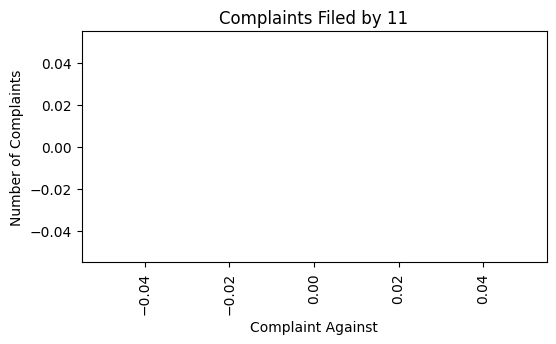

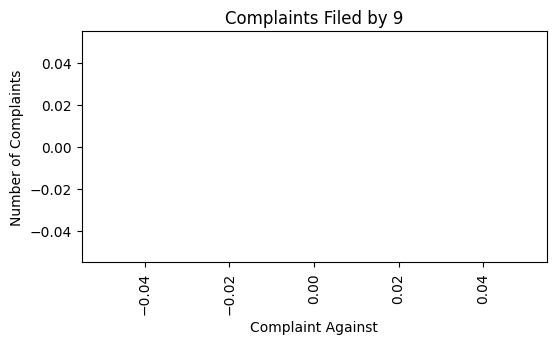

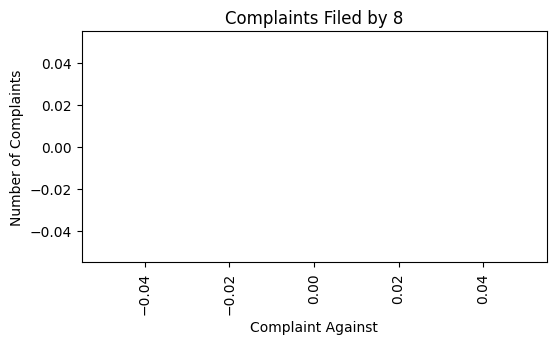

In [355]:
for complainer in top_complainers:
    complaints = df_non_profit[df_non_profit["complainer_name"] == complainer]
    
    # let's group by "complaint_against" and count the number of complaints filed
    complaint_counts = complaints.groupby("complaint_against").size().reset_index(name="complaint_count")
    
    # And then store the result in our dictionary
    complaints_data[complainer] = complaint_counts

    #then plot it
    plt.figure(figsize=(6, 3))
    plt.bar(complaint_counts["complaint_against"], complaint_counts["complaint_count"], color="thistle")
    plt.xlabel("Complaint Against")
    plt.ylabel("Number of Complaints")
    plt.title(f"Complaints Filed by {complainer}")
    plt.xticks(rotation=90)
    plt.show()

**What can we learn from this?** <br>
* For the top organiztion, The Be'eri Union of Yeshiva, most complaints were filed against the IDF — this makes sense, because really one of the most major point of friction for ultra-orthodox jews with authority is around their avoidance of military service.
* For the animals rights org, most complaints were filed against the Ministry of Agriculture and the Ministry of Health. This too makes sense. The ministry of Agriculture is, among other things, in charge of regulating what substances are approved for use in farm land and the like. 
* Complaints made by the organization who's assiting employees of the IDF has filed complaints against the IDF and the Treasury
* Complaints filed by the "jewish human rights organization" were against the National Fire and Rescue Authority, the IDF, the Ministry of Justice, and the Ministry of Health. I don't know what to make of this as the complaint count seem too low to drive to any conclusions, and looking at their website, it seems like this organization tends to nitpick on certain people.
* The Association for Civil Rights in Israel had mostly filed complaints against the Prison Authority. 

### Failure to respond
I'm wondering if a "failure to respond" complaint topic results in a "justified" decision for the most part or not?

In [268]:
failure_to_respond = df[df["complaint_topic"] == "failure to respond"]
decision_counts = failure_to_respond["decision"].value_counts()
decision_counts

decision
justified              445
unjustified            167
justified partially     15
Name: count, dtype: int64

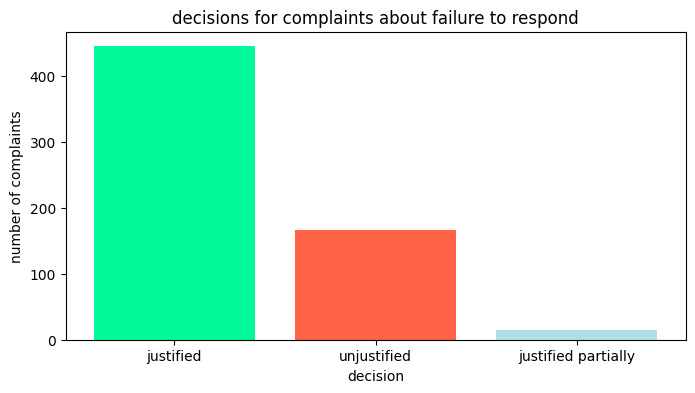

In [280]:
plt.figure(figsize=(8, 4))
plt.bar(decision_counts.index, decision_counts.values, color=["mediumspringgreen", "tomato", "powderblue"])
plt.title("decisions for complaints about failure to respond")
plt.xlabel("decision")
plt.ylabel("number of complaints")
plt.show()

### What about "lack of reasoning"?

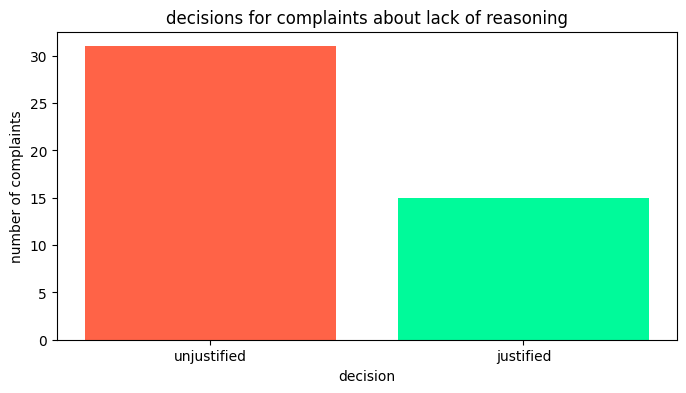

In [281]:
lack_of_reasoning = df[df["complaint_topic"] == "lack of reasoning"]
decision_counts_1 = lack_of_reasoning["decision"].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(decision_counts_1.index, decision_counts_1.values, color=["tomato", "mediumspringgreen", "powderblue"])
plt.title("decisions for complaints about lack of reasoning")
plt.xlabel("decision")
plt.ylabel("number of complaints")
plt.show()

So it seems safe to say that when complaints are about not getting a reponse, the Freedom of Information Unit usually determines that the complaint is justified.
However, when the complaint is about a not-good-enough reponse, the unit is **twice** as likely to decide that the complaint is unjustified rather than justified.

### original request topic

In [286]:
df["original_request_topic"].unique()

array(['בירור פרטני לעניין קביעת שכר הדירה',
       'נתונים על מחלקות פסיכיאטריות ', 'יומן שר המשפטים',
       'התכנית להעברת חיסונים למדינות זרות',
       'חומרי רקע מדיוני קבינט הקורונה ומדיניות הפרסום שלו',
       'מרכזים אקוטיים וטיפול בערכות אונס',
       'קבלת מידע בנושא הקרן לעסקים בערבות המדינה', 'מידע ב 3 בקשות',
       'דוח ria', 'דוח מוניטור בנושא יישום דו"ח מבקר שנתי )2010 )61ב"',
       'failure to respond - מעבר אלנבי פלסטינים',
       'פרסום מניעויות דיינים', 'חולי ונפטרי נגיף הקורונה',
       'מספר נפגעים מתקיפת כלבים', 'הנחיות בגיור',
       'בקשת מידע לקבלת נתונים שנאספו עליי במיונים לצהל."',
       'פרמיות סטודנטים',
       'נתונים על מספר הפטורים שהצבא הנפיק מסיבות רפואיות-נפשיות ומספר ההתאבדויות של חיילים בתקופה של חמש שנים.',
       'החלטה להיטל קנס על חברת הדואר',
       'מידע על החברות שזכו במכרז להבאת תיירים מחוסנים',
       'גיור (שתי בקשות שונות)', 'שיעורי מחזור של בקבוקים גדולים',
       'מערך הגיור', 'חאן לבונה', 'אכיפה בתחום פסולת הבניה',
       'failure t

Unfortunately it seems like this data is pretty unique. There aren't a lot of recurring topics, but the top ones (below) are: <br>
```
Urgent information             7
Data about psychiatric wards   7
Request for information        4
Support distribution details   4
Failure to respond             3
```

In [315]:
df["original_request_topic"].value_counts()[:30]

original_request_topic
מידע דחוף                                                   7
נתונים על מחלקות פסיכיאטריות                                7
בקשת מידע                                                   4
פירוט חלוקת תמיכות                                          4
failure to respond                                          3
בקשות ותכניות                                               2
תקציבי פרסום                                                2
חאן לבונה                                                   2
הקצאת מקרקעין                                               2
הוספת סטודנטים לרפואה                                       2
יישום חוק חובת דיווח                                        2
שריפות פסולת                                                2
תחומי otherיות כפר יונה                                     2
תאורה באסדת הגז לוויתן                                      2
נהלי משרד התיירות                                           2
מידע בנושאים שונים בנושא קורונה                

### let's look at the complaints whose handling is not complete
There are only 15, which is not much to work with. <br>
They all seem to be pretty "fresh" (longest one has been around for 30 days) <br>
8 out of 15 complaints were filed against the Ministry of Health.

In [327]:
undergoing = df[df["status"] == "undergoing"]
undergoing

,request_date,complaint_date,complaint_channel,complainer_kind,complainer_name,complaint_topic,complaint_against,original_request_topic,status,decision,termination_date,days_to_treat


## dates!
Could they reveal something?

In [328]:
# some rows have "termination_date" as NaN (like complaints that are not terminated), so we must drop them first
df_termination_clean= df.dropna(subset=["termination_date"])

In [329]:
#What is the type of the date?
type(df["termination_date"].iloc[0])

str